<h2>Categorical Variables and One Hot Encoding</h2>

One-hot encoding is a technique used to convert categorical data into a numerical format that machine learning algorithms can use. It transforms categorical variables, which may have multiple categories, into a binary matrix where each column represents a category, and the presence of a category is indicated by a 1, while all other columns are 0.

### Definition and Example

**Definition:** One-hot encoding converts categorical data with `n` possible values into `n` binary features. Each feature corresponds to one of the possible values of the categorical variable. 

For example, consider a categorical variable "Color" with three possible values: "Red", "Green", and "Blue". Using one-hot encoding, we can transform this variable into three binary variables as follows:

- "Red" -> [1, 0, 0]
- "Green" -> [0, 1, 0]
- "Blue" -> [0, 0, 1]

### Why One-Hot Encoding is Used

1. **Numerical Representation:** Many machine learning algorithms require numerical input. One-hot encoding allows categorical data to be converted into a numerical form without implying any ordinal relationship between categories.
2. **Avoiding Ordinality:** Unlike label encoding, one-hot encoding does not assume any order or ranking among categories, preventing the model from assuming a false relationship between them.
3. **Improved Model Performance:** By providing a clear, distinct representation of each category, one-hot encoding can improve the performance of algorithms that rely on distance measures, such as K-nearest neighbors (KNN) or algorithms that benefit from a clear separation of features, like neural networks.

### Code Example

Let's use Python with the popular library `pandas` and `sklearn` to demonstrate one-hot encoding:

```python
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Sample DataFrame
data = pd.DataFrame({
    'Color': ['Red', 'Green', 'Blue', 'Green', 'Red']
})

# Display the original DataFrame
print("Original DataFrame:")
print(data)

# One-hot encoding using pandas
one_hot_encoded_data = pd.get_dummies(data, columns=['Color'])
print("\nOne-Hot Encoded DataFrame (using pandas):")
print(one_hot_encoded_data)

# One-hot encoding using sklearn
encoder = OneHotEncoder(sparse=False)  # sparse=False to get a dense array
encoded_array = encoder.fit_transform(data[['Color']])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Color']))

print("\nOne-Hot Encoded DataFrame (using sklearn):")
print(encoded_df)
```

### Explanation of Code

1. **Original DataFrame:** We start with a DataFrame containing a single categorical column "Color" with values "Red", "Green", and "Blue".
2. **Using pandas for One-Hot Encoding:** The `pd.get_dummies` function is used to convert the categorical "Color" column into one-hot encoded columns. Each unique value in "Color" gets its column, with 1 indicating the presence of that color and 0 indicating its absence.
3. **Using sklearn for One-Hot Encoding:** We create an `OneHotEncoder` object from `sklearn`, fit it to the "Color" column, and transform the data. This produces a dense array where each row corresponds to the one-hot encoded representation of the original "Color" values. We then convert this array back into a DataFrame for easier readability.

By using one-hot encoding, we ensure that our categorical data is represented in a way that machine learning algorithms can effectively use without introducing unintended ordinal relationships.

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
data = pd.DataFrame({
    'Color': ['Red', 'Green', 'Blue', 'Green', 'Red']
})

# Display the original DataFrame
print("Original DataFrame:")
print(data)

# One-hot encoding using pandas
one_hot_encoded_data = pd.get_dummies(data, columns=['Color'])
print("\nOne-Hot Encoded DataFrame (using pandas):")
print(one_hot_encoded_data)

# One-hot encoding using sklearn
encoder = OneHotEncoder(sparse=False)  # sparse=False to get a dense array
encoded_array = encoder.fit_transform(data[['Color']])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Color']))

print("\nOne-Hot Encoded DataFrame (using sklearn):")
print(encoded_df)

In [10]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
data = pd.DataFrame({
    'role': ['SDE','Tester','designer','SDE','SDE','Tester']
})
print("Original dataframe\n",data)
one_hot_encoded_data = pd.get_dummies(data,columns=['role'])
print("pandas_dataframe\n",one_hot_encoded_data)
encoder = OneHotEncoder(sparse_output=False)

encoded = encoder.fit_transform(data[['role']])
encoded_df = pd.DataFrame(encoded,columns=encoder.get_feature_names_out(['role']))
encoded_df


Original dataframe
        role
0       SDE
1    Tester
2  designer
3       SDE
4       SDE
5    Tester
pandas_dataframe
    role_SDE  role_Tester  role_designer
0      True        False          False
1     False         True          False
2     False        False           True
3      True        False          False
4      True        False          False
5     False         True          False


,role_SDE,role_Tester,role_designer
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,0.0,1.0,0.0


Label encoding is used when the categorical variable has an order or ranking. Each category is assigned a unique numerical value. This is useful when the numerical representation carries meaningful information, like ratings. However, some machine learning algorithms may interpret the values as having a mathematical relationship, which may not be appropriate for categorical variables without an order.

One-hot encoding is used when the categorical variable has no order. Each category is represented by a binary vector, with only one element as "hot" (1) and the rest as "cold" (0). This creates a binary feature for each category, allowing the algorithm to treat each category independently.

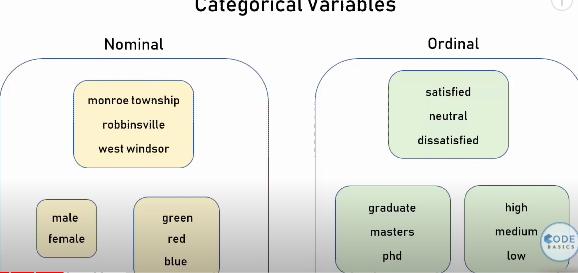

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv("homeprices.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


<h2 style='color:purple'>Using pandas to create dummy variables</h2>

In [11]:
dummies = pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [12]:
df_dummies= pd.concat([df,dummies],axis='columns')
df_dummies

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [13]:
df_dummies.drop('town',axis='columns',inplace=True)
df_dummies

,area,price,monroe township,robinsville,west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


<h3 style='color:purple'>Dummy Variable Trap</h3>

When you can derive one variable from other variables, they are known to be multi-colinear. Here
if you know values of california and georgia then you can easily infer value of new jersey state, i.e. 
california=0 and georgia=0. There for these state variables are called to be multi-colinear. In this
situation linear regression won't work as expected. Hence you need to drop one column. 

**NOTE: sklearn library takes care of dummy variable trap hence even if you don't drop one of the 
    state columns it is going to work, however we should make a habit of taking care of dummy variable
    trap ourselves just in case library that you are using is not handling this for you**

In [14]:
df_dummies.drop('west windsor',axis='columns',inplace=True)
df_dummies

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [15]:
X = df_dummies.drop('price',axis='columns')
y = df_dummies.price

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [17]:
model.predict(X) # 2600 sqr ft home in new jersey

array([ 539709.7398409 ,  590468.71640508,  615848.20468716,
        666607.18125134,  717366.15781551,  579723.71533005,
        605103.20361213,  668551.92431735,  706621.15674048,
        565396.15136531,  603465.38378844,  628844.87207052,
        692293.59277574])

In [18]:
model.score(X,y)

0.95739290372218733

In [19]:
model.predict([[3400,0,0]]) # 3400 sqr ft home in west windsor

array([ 681241.66845839])

In [20]:
model.predict([[2800,0,1]]) # 2800 sqr ft home in robbinsville

array([ 590775.63964739])

<h2 style='color:purple'>Using sklearn OneHotEncoder</h2>

First step is to use label encoder to convert town names into numbers

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
dfle = df
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [23]:
X = dfle[['town','area']].values

In [24]:
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [25]:
y = dfle.price.values
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000], dtype=int64)

Now use one hot encoder to create dummy variables for each of the town

In [26]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0])

In [27]:
X = ohe.fit_transform(X).toarray()
X

array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.60000000e+03],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.00000000e+03],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.20000000e+03],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.60000000e+03],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          4.00000000e+03],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          2.60000000e+03],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          2.80000000e+03],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          3.30000000e+03],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          3.60000000e+03],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.60000000e+03],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.90000000e+03],
       [  0.00000000e

In [28]:
X = X[:,1:]

In [29]:
X

array([[  0.00000000e+00,   0.00000000e+00,   2.60000000e+03],
       [  0.00000000e+00,   0.00000000e+00,   3.00000000e+03],
       [  0.00000000e+00,   0.00000000e+00,   3.20000000e+03],
       [  0.00000000e+00,   0.00000000e+00,   3.60000000e+03],
       [  0.00000000e+00,   0.00000000e+00,   4.00000000e+03],
       [  0.00000000e+00,   1.00000000e+00,   2.60000000e+03],
       [  0.00000000e+00,   1.00000000e+00,   2.80000000e+03],
       [  0.00000000e+00,   1.00000000e+00,   3.30000000e+03],
       [  0.00000000e+00,   1.00000000e+00,   3.60000000e+03],
       [  1.00000000e+00,   0.00000000e+00,   2.60000000e+03],
       [  1.00000000e+00,   0.00000000e+00,   2.90000000e+03],
       [  1.00000000e+00,   0.00000000e+00,   3.10000000e+03],
       [  1.00000000e+00,   0.00000000e+00,   3.60000000e+03]])

In [30]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
model.predict([[0,1,3400]]) # 3400 sqr ft home in west windsor

array([ 681241.6684584])

In [32]:
model.predict([[1,0,2800]]) # 2800 sqr ft home in robbinsville

array([ 590775.63964739])

<h2 style='color:green'>Exercise</h2>

At the same level as this notebook on github, there is an Exercise folder that contains carprices.csv.
This file has car sell prices for 3 different models. First plot data points on a scatter plot chart
to see if linear regression model can be applied. If yes, then build a model that can answer
following questions,

**1) Predict price of a mercedez benz that is 4 yr old with mileage 45000**

**2) Predict price of a BMW X5 that is 7 yr old with mileage 86000**

**3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())**